<a href="https://colab.research.google.com/github/Samia-Islam-Ridi/AI-LAB/blob/main/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [2]:
!pip install imbalanced-learn

In [3]:
pip install tensorflow

In [4]:
pip install scikeras

In [5]:
pip install xgboost

In [6]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy
import time

from imblearn.over_sampling import SMOTE
from collections import Counter
import itertools

from sklearn.tree import DecisionTreeClassifier
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout,Activation,BatchNormalization
from scikeras import wrappers
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve, auc as auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_score,cross_val_predict, cross_validate
from sklearn.metrics import make_scorer,precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier

In [7]:

file_path =("/content/heart.csv")
df = pd.read_csv(file_path)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [11]:
df.value_counts('target')

,count
target,
1,165
0,138


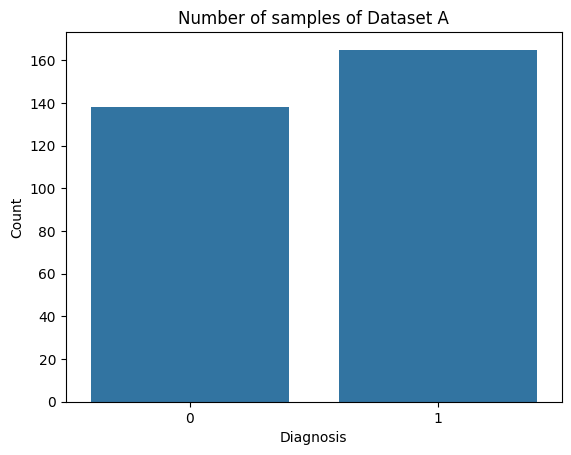

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='target', data=df)
plt.title('Number of samples of Dataset A')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.savefig('Number of samples of Dataset A.pdf', bbox_inches='tight')
plt.show()

In [14]:
df = df[df['target'] != '1']
df.value_counts('target')

,count
target,
1,165
0,138


In [15]:
num_cols = df.shape[1]

print("Number of columns:", num_cols)

Number of columns: 14


In [16]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns


age
Skew : -0.2


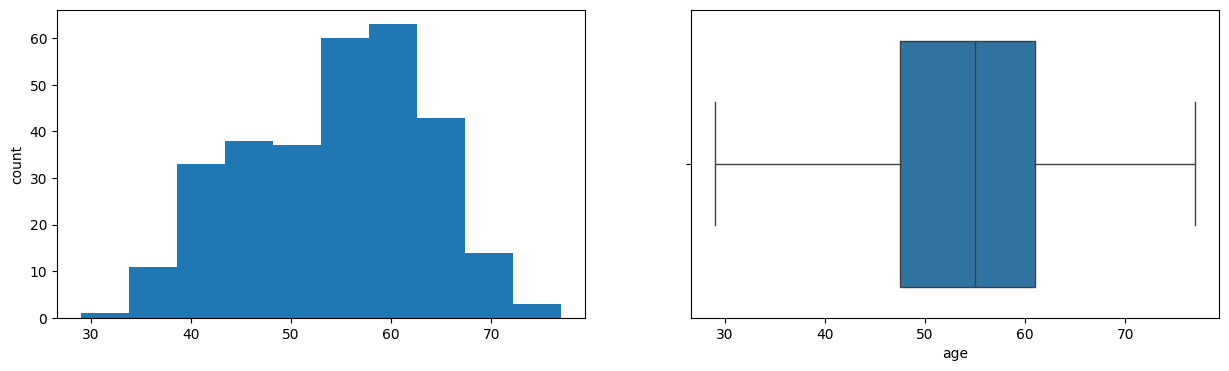

sex
Skew : -0.79


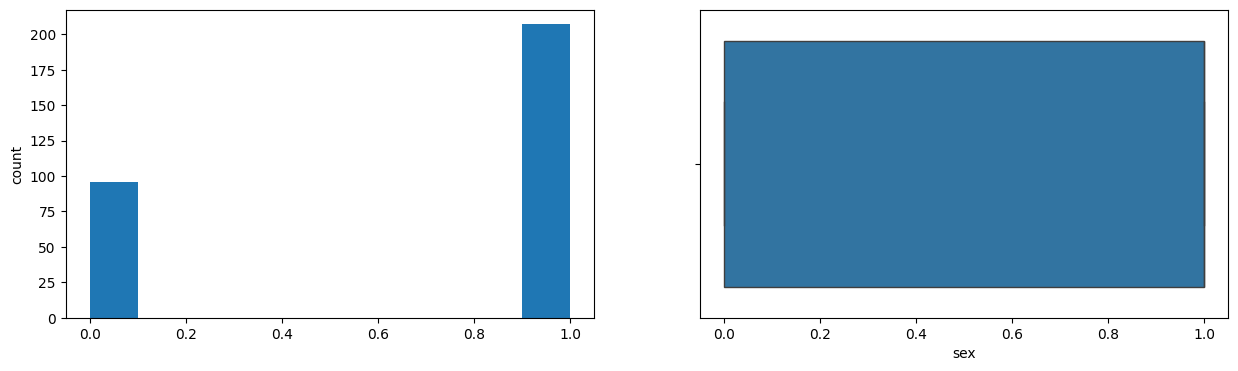

cp
Skew : 0.48


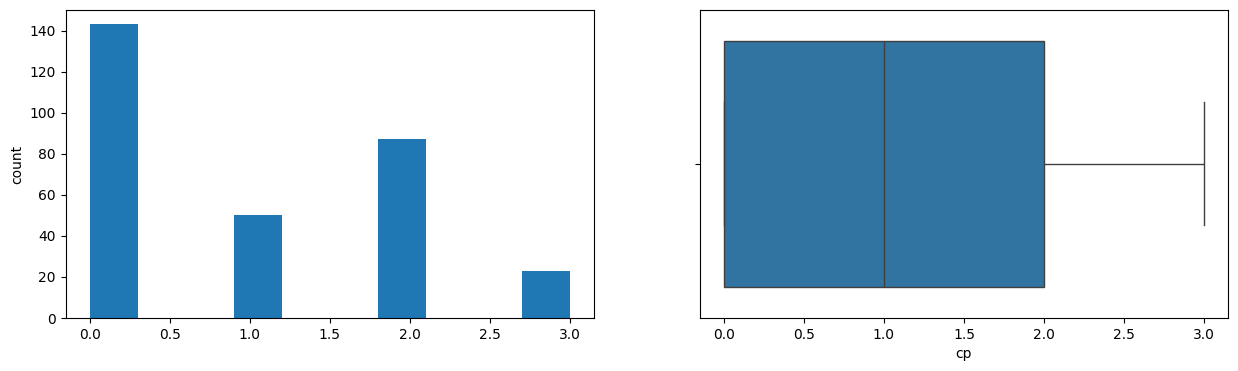

trestbps
Skew : 0.71


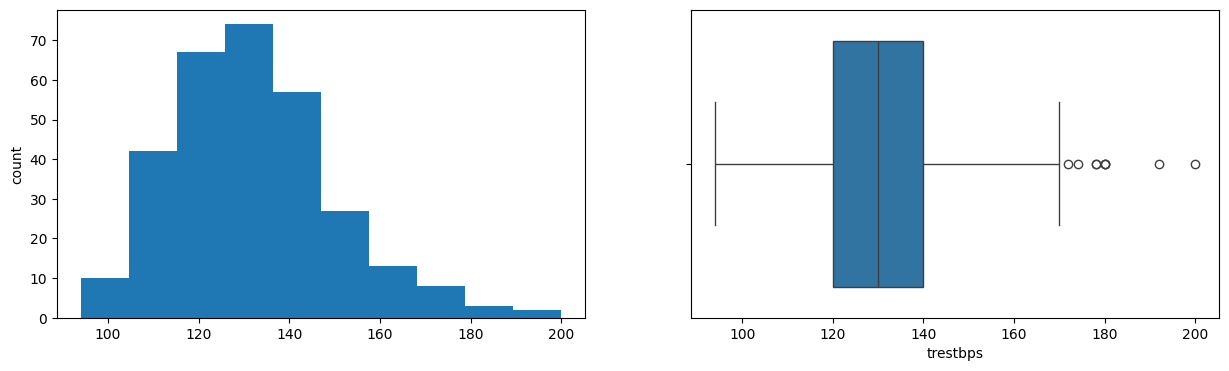

chol
Skew : 1.14


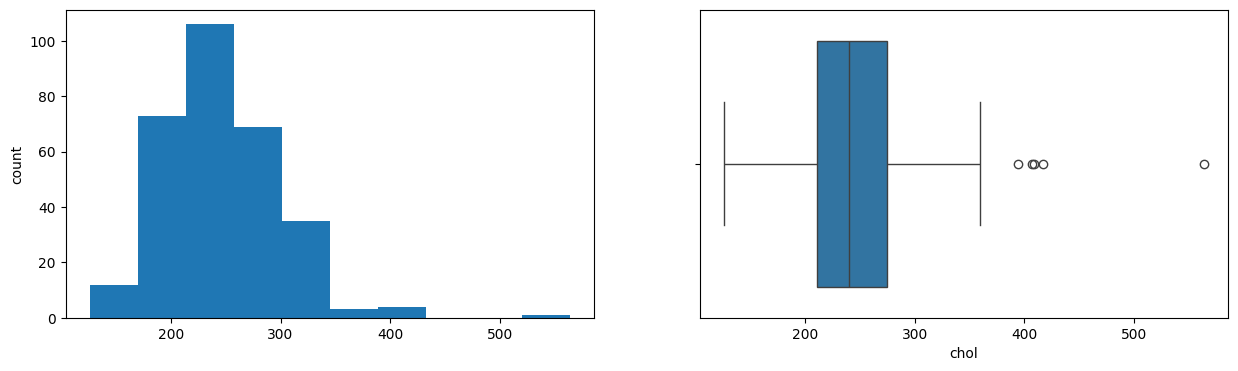

fbs
Skew : 1.99


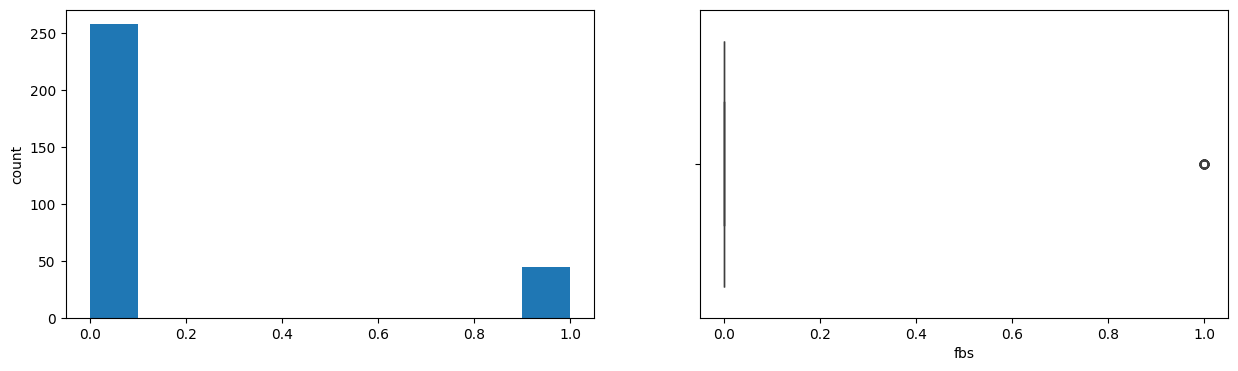

restecg
Skew : 0.16


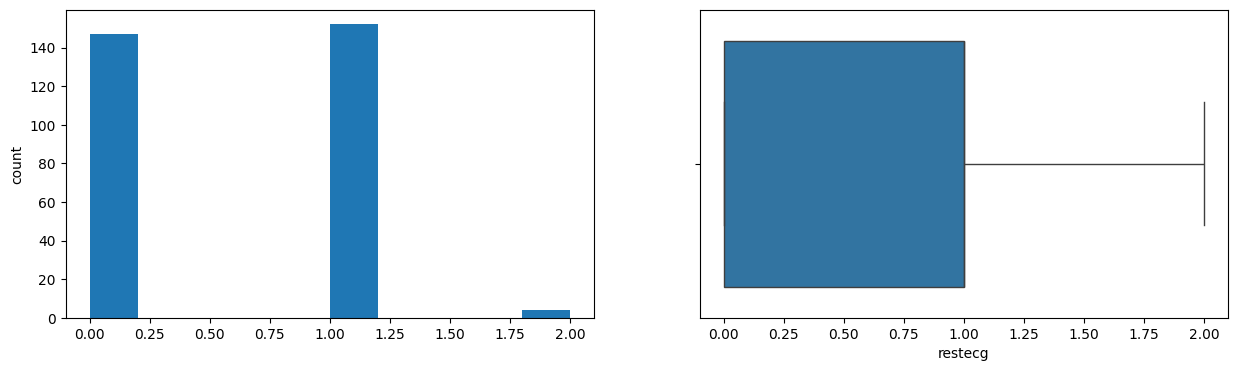

thalach
Skew : -0.54


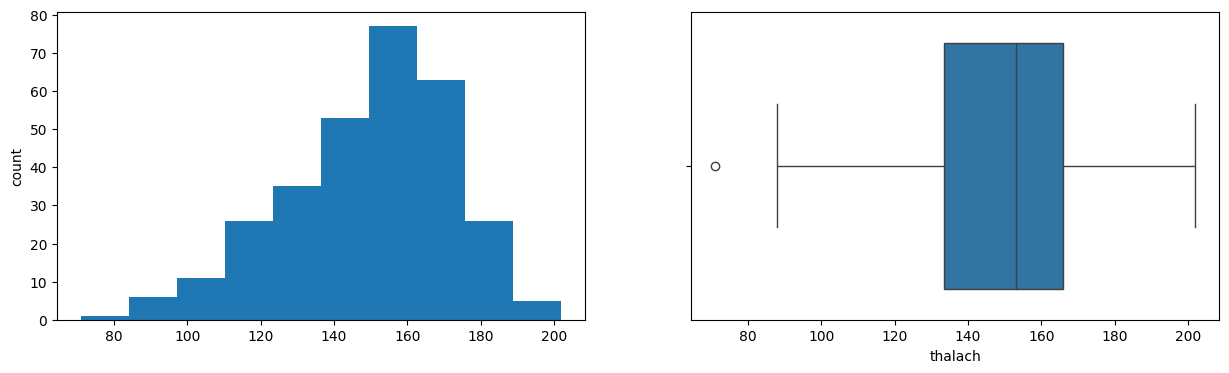

exang
Skew : 0.74


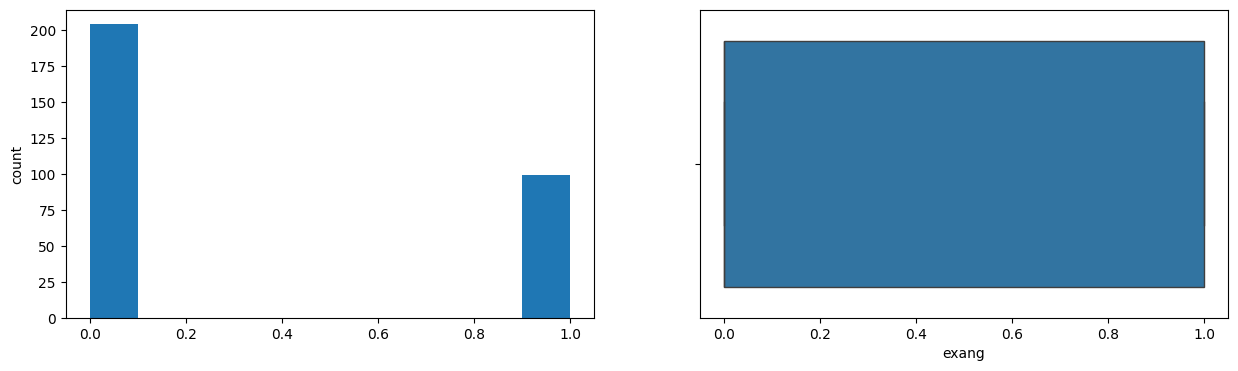

oldpeak
Skew : 1.27


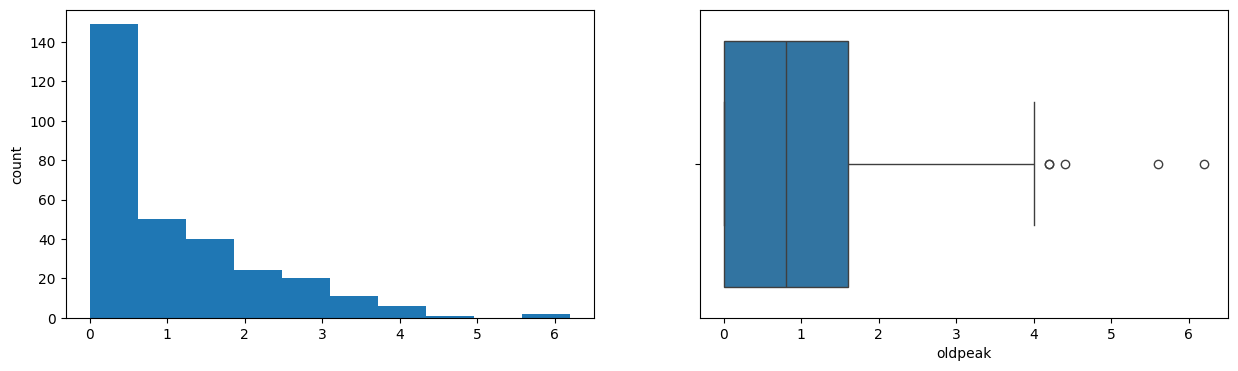

slope
Skew : -0.51


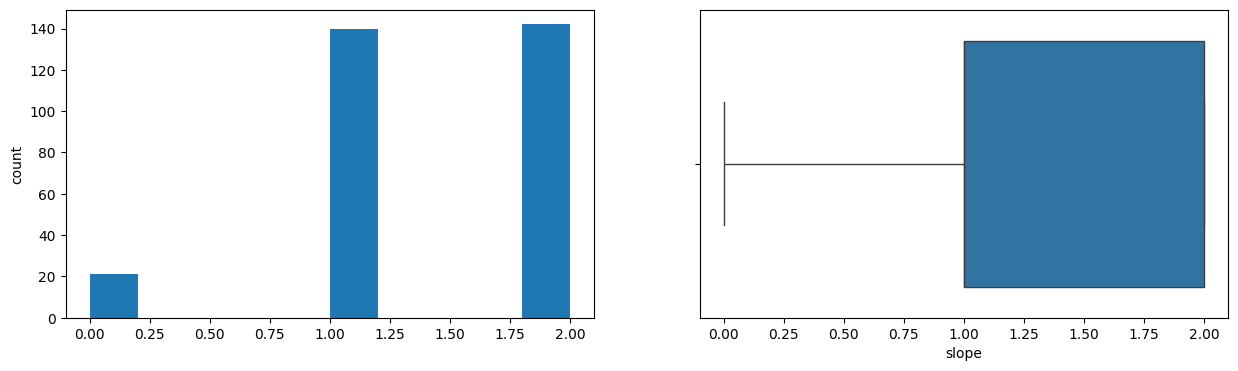

ca
Skew : 1.31


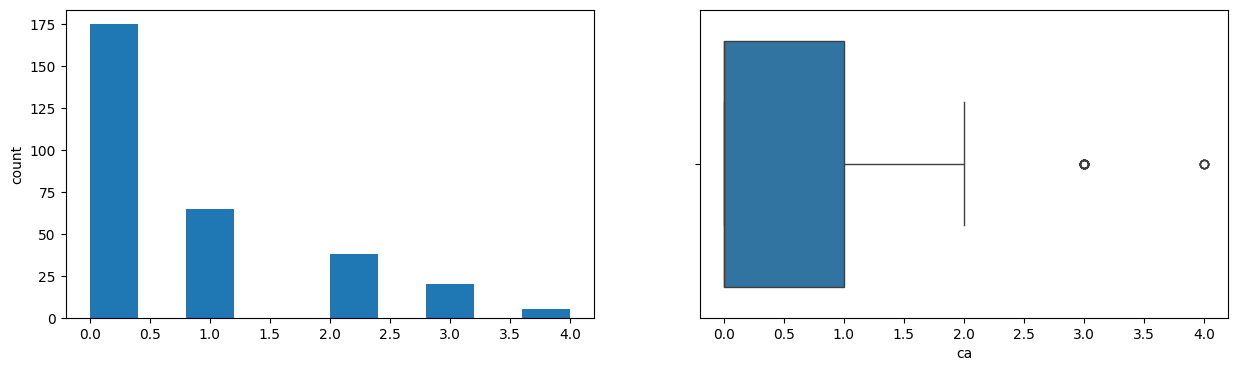

thal
Skew : -0.48


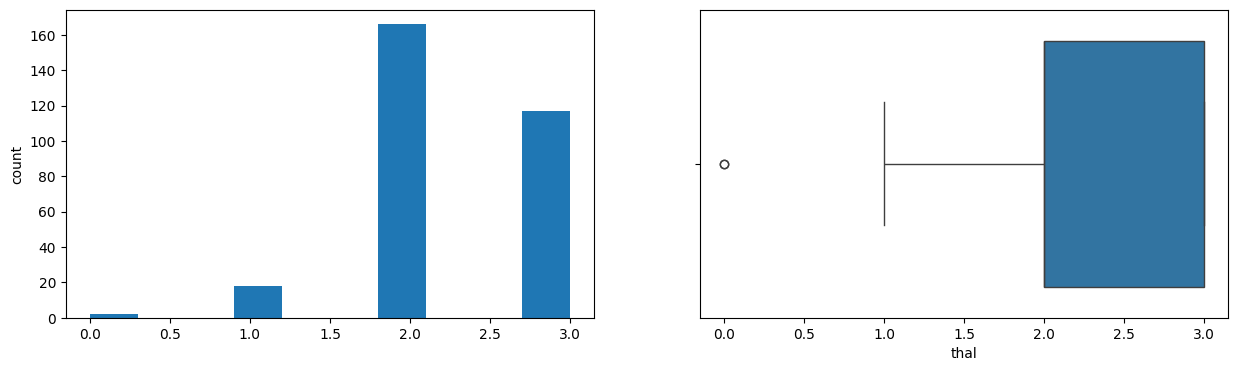

target
Skew : -0.18


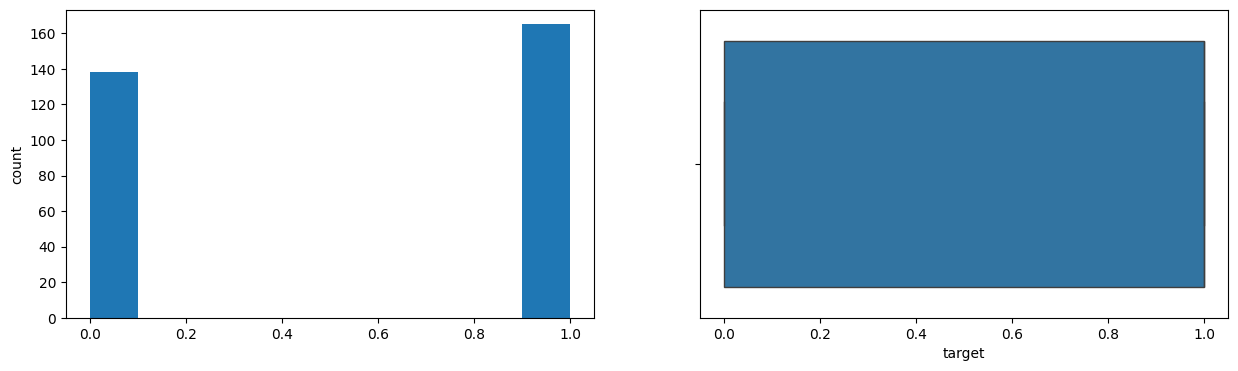

In [17]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

In [19]:
x = df.drop(columns=['target'])

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [23]:
x = df.drop(columns=['target'])
y = df['target']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)

In [25]:
# Impute missing values using the mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# feature normalized
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8360655737704918
Precision: 0.84375
Recall: 0.84375
F1 Score: 0.84375


In [28]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Print the metrics
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1 Score: {f1_dt}")

Accuracy: 0.7540983606557377
Precision: 0.84
Recall: 0.65625
F1 Score: 0.7368421052631579


In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Print the metrics
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1 Score: {f1_knn}")

Accuracy: 0.9016393442622951
Precision: 0.9333333333333333
Recall: 0.875
F1 Score: 0.9032258064516129


In [32]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# Print the metrics
print(f"Accuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1 Score: {f1_lr}")

Accuracy: 0.8524590163934426
Precision: 0.8709677419354839
Recall: 0.84375
F1 Score: 0.8571428571428571


In [34]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred_ada = adaboost_model.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada)
recall_ada = recall_score(y_test, y_pred_ada)
f1_ada = f1_score(y_test, y_pred_ada)

# Print the metrics
print(f"Accuracy: {accuracy_ada}")
print(f"Precision: {precision_ada}")
print(f"Recall: {recall_ada}")
print(f"F1 Score: {f1_ada}")

Accuracy: 0.819672131147541
Precision: 0.8888888888888888
Recall: 0.75
F1 Score: 0.8135593220338984


In [36]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb= f1_score(y_test, y_pred_nb)

# Print the metrics
print(f"Accuracy: {accuracy_nb}")
print(f"Precision: {precision_nb}")
print(f"Recall: {recall_nb}")
print(f"F1 Score: {f1_nb}")

Accuracy: 0.8688524590163934
Precision: 0.9
Recall: 0.84375
F1 Score: 0.8709677419354839


In [38]:
from sklearn.svm import SVC
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_svm= accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm= f1_score(y_test, y_pred_svm)

# Print the metrics
print(f"Accuracy: {accuracy_svm}")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1 Score: {f1_svm}")

Accuracy: 0.8688524590163934
Precision: 0.9
Recall: 0.84375
F1 Score: 0.8709677419354839


In [40]:
from keras.models import Sequential
from keras.layers import Dense

# Define ANN model
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
ann_predictions = ann_model.predict(X_test)
y_pred_ann = (y_pred > 0.5).astype("int32")

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_ann)
precision = precision_score(y_test, y_pred_ann)
recall = recall_score(y_test, y_pred_ann)
f1 = f1_score(y_test, y_pred_ann)

# Output results
print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"F1 score: {f1}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.6257 - loss: 0.6723 - val_accuracy: 0.6885 - val_loss: 0.5901
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7838 - loss: 0.5497 - val_accuracy: 0.7213 - val_loss: 0.5292
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7383 - loss: 0.5206 - val_accuracy: 0.7869 - val_loss: 0.4857
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7885 - loss: 0.4767 - val_accuracy: 0.8197 - val_loss: 0.4513
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8189 - loss: 0.4280 - val_accuracy: 0.8525 - val_loss: 0.4271
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8553 - loss: 0.4127 - val_accuracy: 0.8525 - val_loss: 0.4085
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8537 - loss: 0.3854 - val_accuracy: 0.8525 - val_loss: 0.4018
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8243 - loss: 0.3713 - val_accuracy: 0.8525 - val_loss: 0.3986


In [41]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.model_selection import train_test_split

if len(X_train.shape) == 2:
    X_train = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(150, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(150, activation='relu'))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred = model_lstm.predict(X_test)
y_pred_lstm = (y_pred > 0.5).astype("int32")

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred_lstm)
precision = precision_score(y_test, y_pred_lstm)
recall = recall_score(y_test, y_pred_lstm)
f1 = f1_score(y_test, y_pred_lstm)

# Output results
print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"F1 score: {f1}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - accuracy: 0.6589 - loss: 0.6911 - val_accuracy: 0.8689 - val_loss: 0.6817
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8338 - loss: 0.6799 - val_accuracy: 0.8689 - val_loss: 0.6639
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8205 - loss: 0.6621 - val_accuracy: 0.8689 - val_loss: 0.6314
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8106 - loss: 0.6277 - val_accuracy: 0.8689 - val_loss: 0.5762
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8209 - loss: 0.5774 - val_accuracy: 0.8852 - val_loss: 0.4957
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8319 - loss: 0.4859 - val_accuracy: 0.8852 - val_loss: 0.4098
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8269 - loss: 0.4006 - val_accuracy: 0.8852 - val_loss: 0.3650
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8418 - loss: 0.3624 - val_accuracy: 0.8852 - val_loss: 0.3666


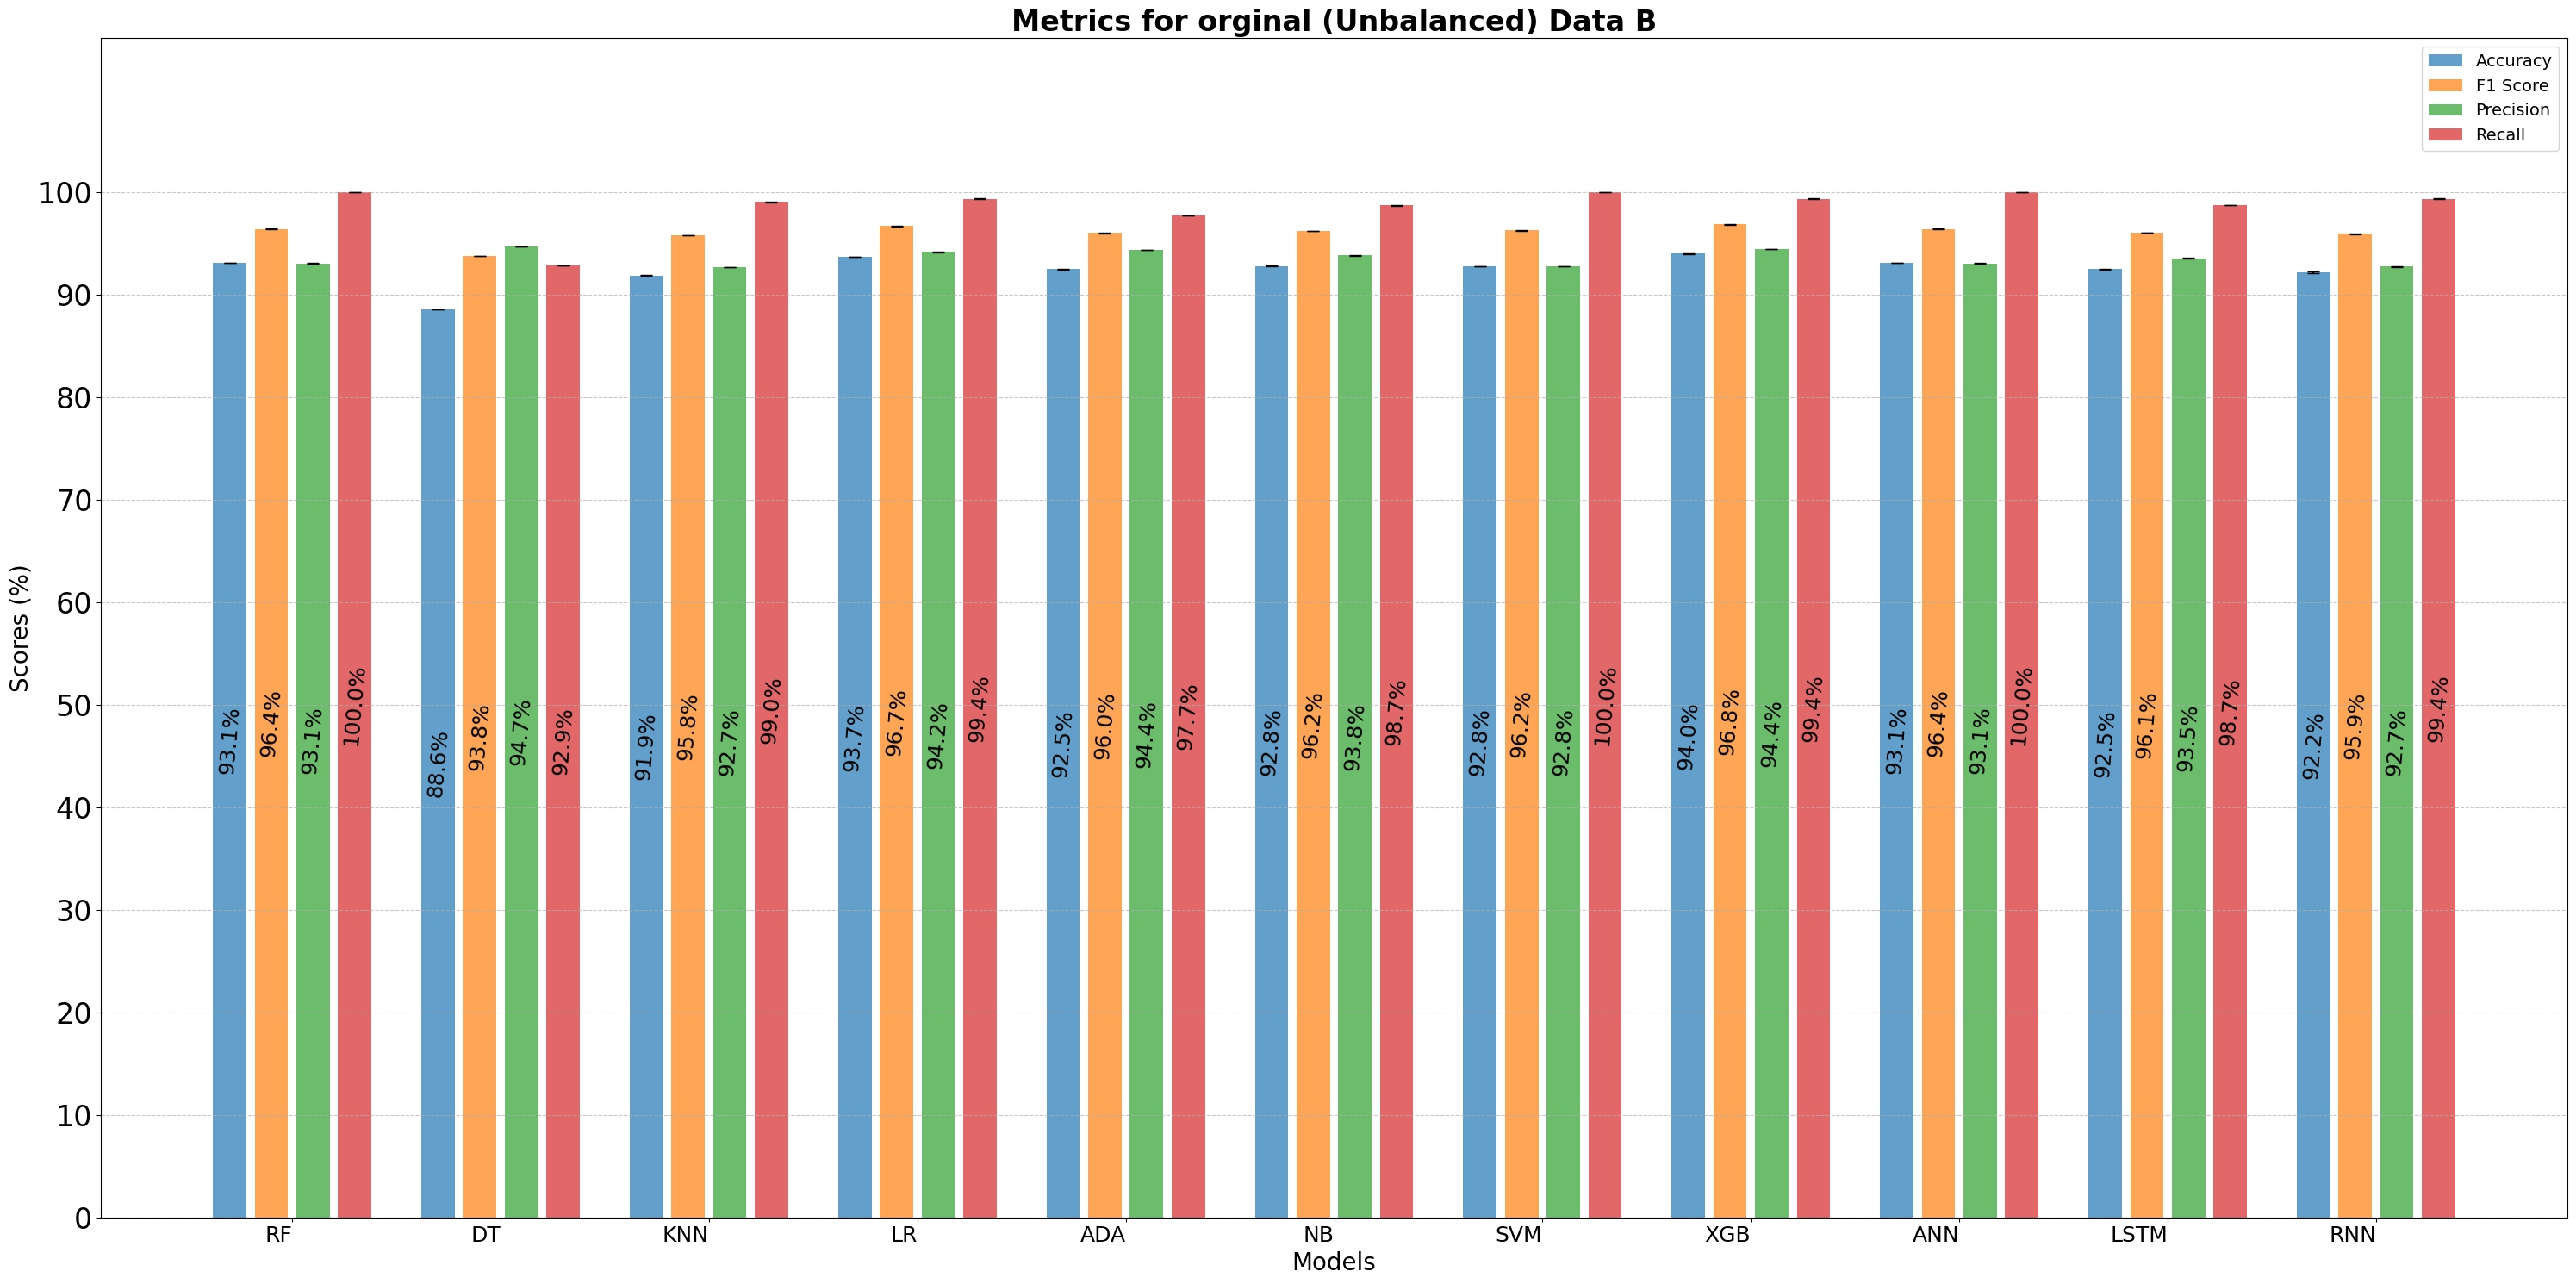

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their corresponding metrics
models = ['RF', 'DT', 'KNN', 'LR', 'ADA', 'NB', 'SVM', 'XGB', 'ANN', 'LSTM', 'RNN']

# Accuracy, Precision, Recall, F1 Score for each model (updated based on the provided data)
accuracy = [100 * x for x in [
    0.9307228915662651, 0.8855421686746988, 0.9186746987951807, 0.9367469879518072, 0.9246987951807228,
    0.927710843373494, 0.927710843373494, 0.9397590361445783, 0.9307228915662651, 0.9246987951807228,
    0.9216867469879518
]]
precision = [100 * x for x in [
    0.9305135951661632, 0.9470198675496688, 0.9270516717325228, 0.9415384615384615, 0.9435736677115988,
    0.9382716049382716, 0.927710843373494, 0.9444444444444444, 0.9305135951661632, 0.9353846153846154,
    0.9272727272727272
]]
recall = [100 * x for x in [
    1.0, 0.9285714285714286, 0.9902597402597403, 0.9935064935064936, 0.9772727272727273,
    0.987012987012987, 1.0, 0.9935064935064936, 1.0, 0.987012987012987, 0.9935064935064936
]]
f1_score = [100 * x for x in [
    0.9640062597809077, 0.9377049180327869, 0.957613814756672, 0.966824644549763, 0.960127591706539,
    0.9620253164556962, 0.9625, 0.9683544303797469, 0.9640062597809077, 0.9605055292259084,
    0.9592476489028213
]]

# Dummy error values for error bars (calculated or assumed for the sake of this example)
error_accuracies = [0.02, 0.03, 0.02, 0.02, 0.02, 0.03, 0.02, 0.01, 0.02, 0.02, 0.05]
error_precisions = [0.01, 0.02, 0.01, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.02, 0.05]
error_recalls = [0.01, 0.01, 0.02, 0.01, 0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.05]
error_f1_scores = [0.02, 0.03, 0.02, 0.02, 0.02, 0.03, 0.02, 0.01, 0.02, 0.02, 0.05]

# Metrics and labels
metrics = [accuracy, f1_score, precision, recall]
metrics_labels = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
metrics_errors = [error_accuracies, error_f1_scores, error_precisions, error_recalls]

# Bar chart setup
x_pos = np.arange(len(models))
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(30, 15))

# Plot grouped bars with error bars
for i, (metric, label, errors) in enumerate(zip(metrics, metrics_labels, metrics_errors)):
    bar = ax.bar(
        x_pos + i * width, metric, width * 0.8, yerr=errors,
        label=label, alpha=0.7, ecolor='black', capsize=5
    )

    # Add labels for the bar values inside the bars
    for j, (rect, value) in enumerate(zip(bar, metric)):
        height = rect.get_height()

        offset_x = rect.get_x() + rect.get_width() / 2.0
        offset_y = height * 0.5

        # For `0.0%` values, place the text inside the bar with a small gap
        if value == 0.0:
            ax.text(
                offset_x,
                1,  # Add a small gap above the bottom of the bar
                f'{value:.1f}%',
                ha='center',
                va='center',
                fontsize=18,
                color='black',
                rotation=5,  # No rotation for 0.0%
                rotation_mode='anchor'
            )

        else:
            ax.text(
                offset_x,
                offset_y,
                f'{value:.1f}%',
                ha='center',
                va='center',
                fontsize=18,
                color='black',
                rotation=85,  # Rotate the non-zero text
                rotation_mode='anchor'
            )
x_pos_adjusted = x_pos.copy()
x_pos_adjusted[-1] += 0.2

# Styling and layout
ax.set_title('Metrics for orginal (Unbalanced) Data B', fontsize=24, weight='bold')
ax.set_xlabel('Models', fontsize=20)
ax.set_ylabel('Scores (%)', fontsize=20)
ax.set_xticks(x_pos + width * 1.5)
ax.set_xticklabels(models, ha= 'right', fontsize=18)
ax.set_ylim(0, 115)
ax.set_yticks(np.arange(0, 110, 10))
ax.tick_params(axis='y', labelsize=24)
ax.legend(fontsize=14, loc='upper right', bbox_to_anchor=(1, 1))
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('Metrics for orginal (Unbalanced) Data B.pdf', bbox_inches='tight')
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


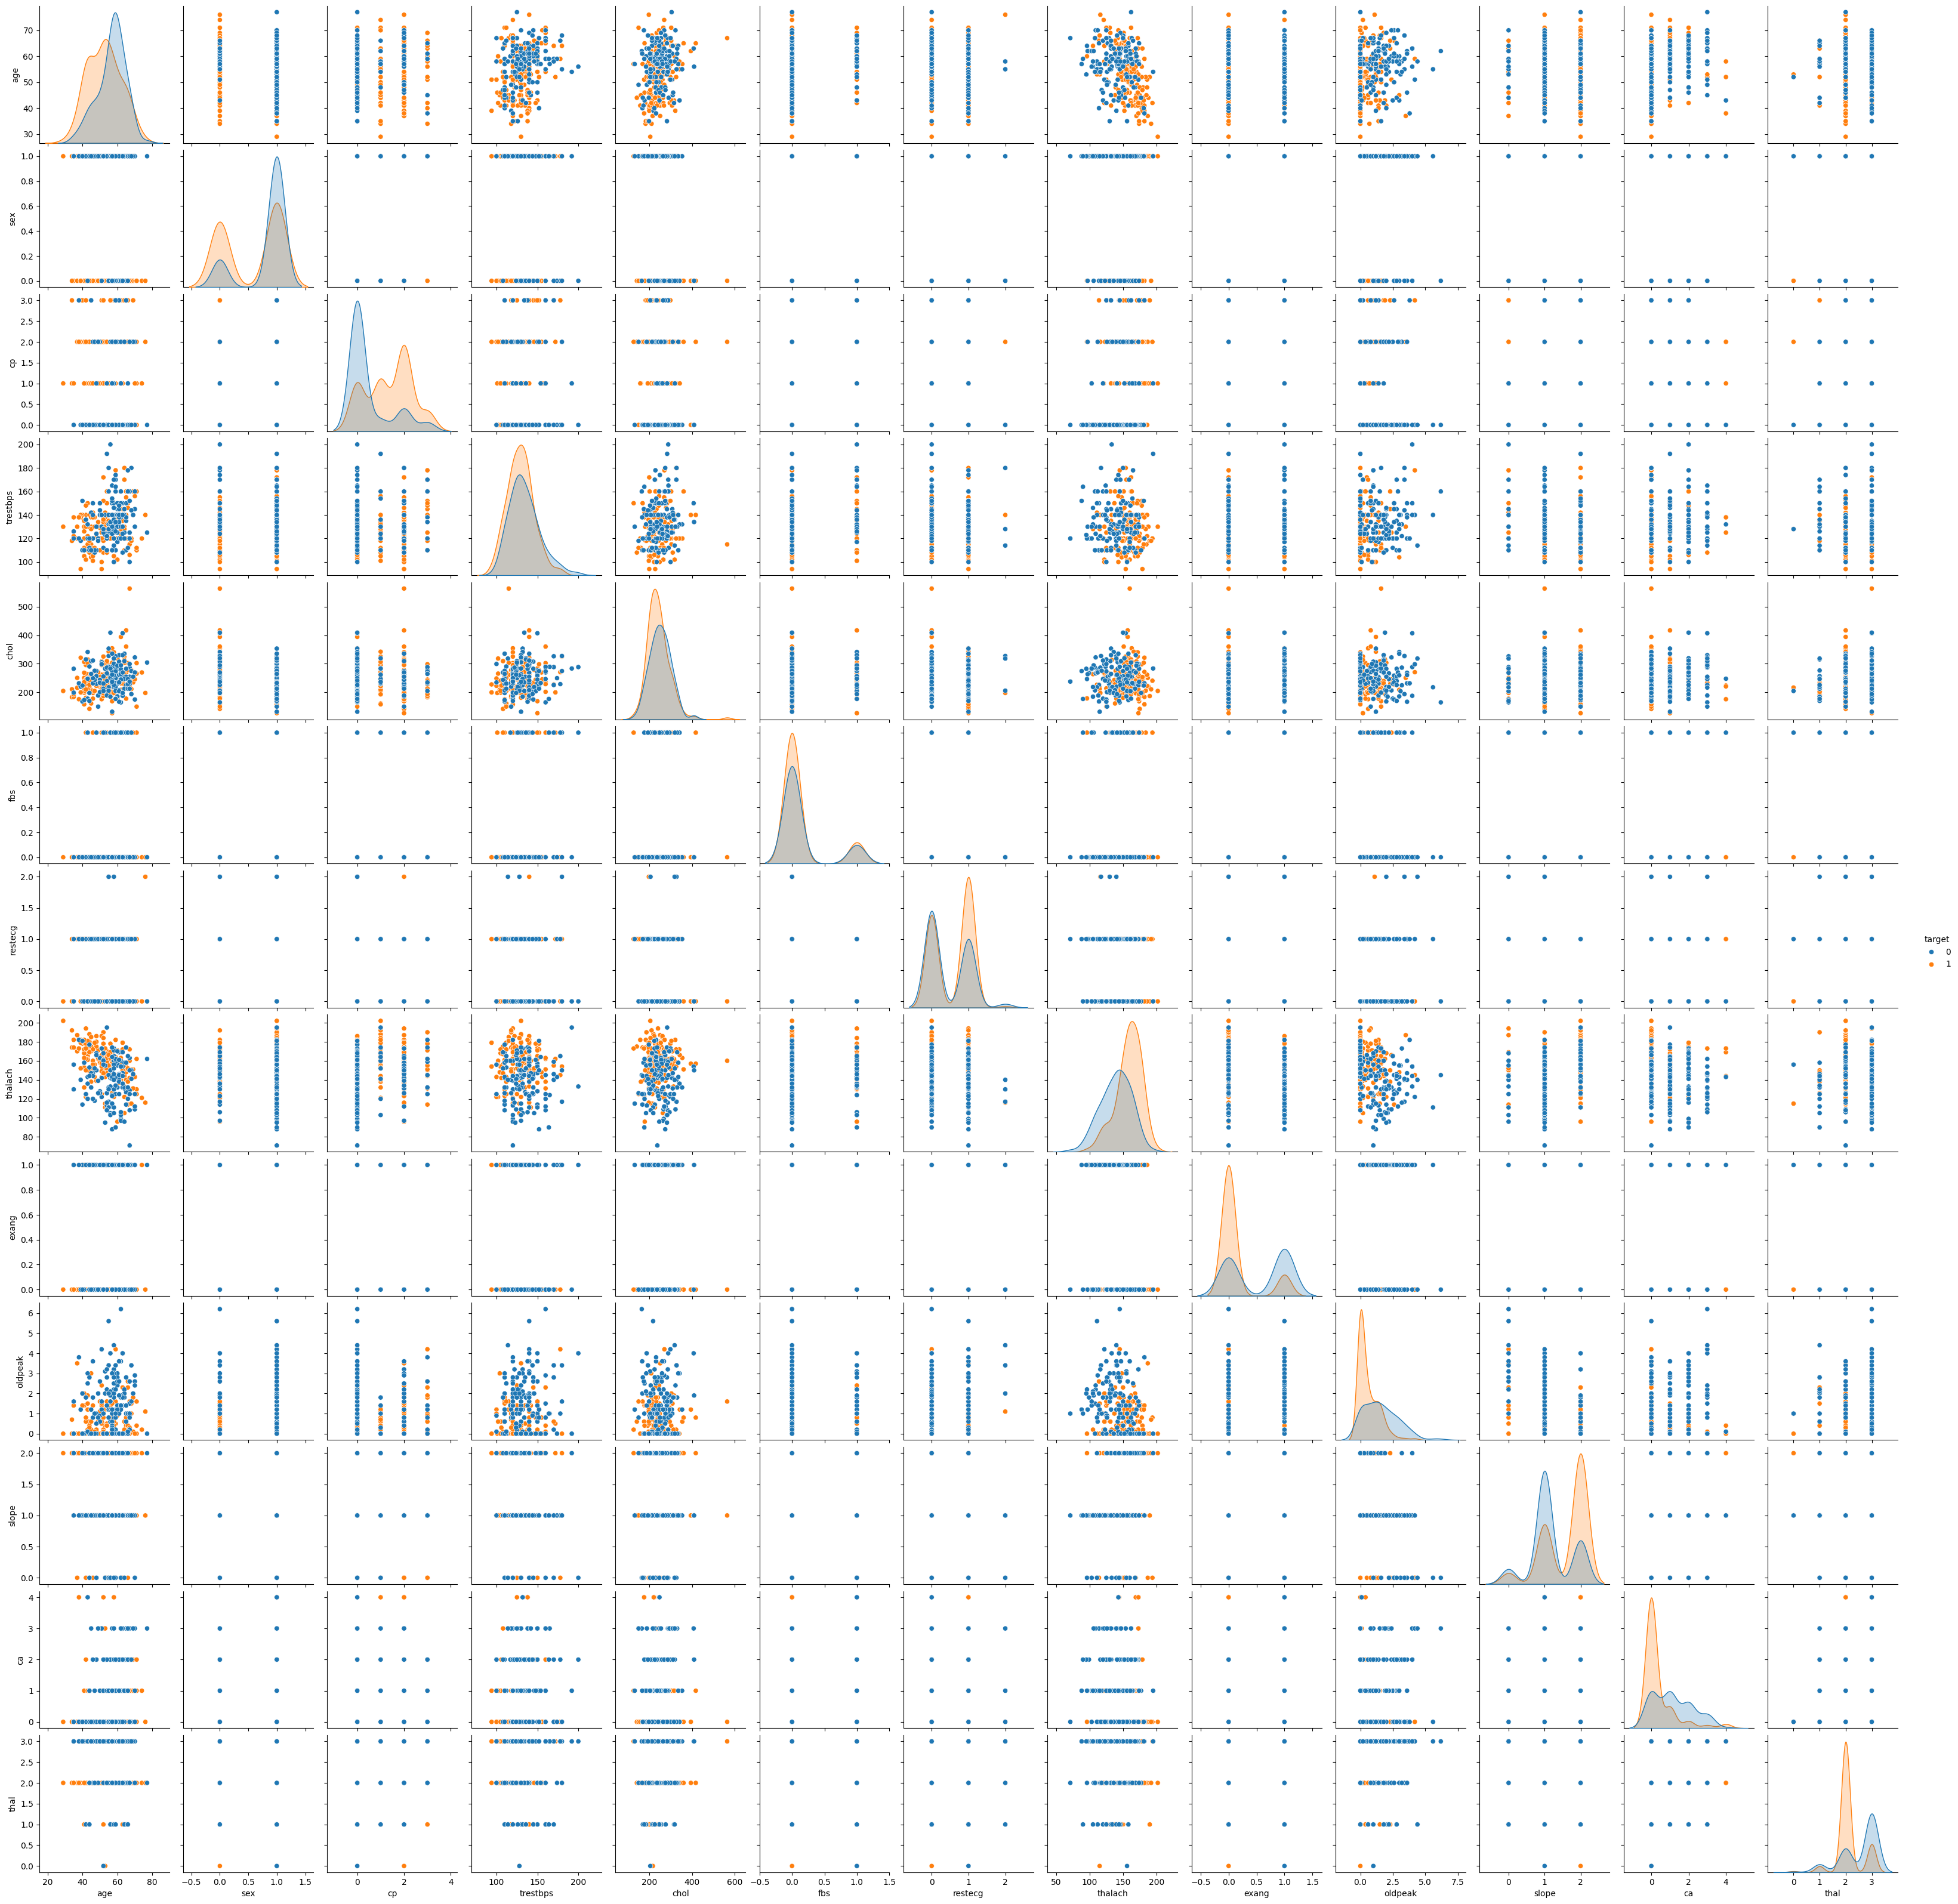

In [43]:
df.info()
sns.pairplot(df, hue = 'target')

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Compute the correlation matrix
corr = df.corr(numeric_only=False)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(21, 21), dpi=700)

# Draw the heatmap with the mask
fig = sns.heatmap(corr, vmin=-0.1, vmax=1.0, mask=mask,
                  annot=True, fmt=".2f", cmap='coolwarm',
                  square=True, linewidths=0.9,
                  cbar_kws={"shrink":0.6,  "pad":0.000001})

cbar.ax.set_position([0.95, 0.1, 0.03, 0.8])
cust_labels = df.columns.tolist()
cust_labels[0] = ''
fig.set_yticklabels(cust_labels)
fig.tick_params(axis='y', which='both', length=0)
cust_labels = df.columns.tolist()
cust_labels[len(cust_labels)-1]= ''
fig.set_xticklabels(cust_labels)
fig.tick_params(axis='x', which='both', length=0)
plt.title("Correlation for Features Of Dataset A", fontsize=14)
plt.savefig("Correlation for Features Of Dataset A.pdf", bbox_inches='tight') # save figure
plt.show()

NameError: name 'cbar' is not defined